#### ORIGEM DO DATASET

link: www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

#### IMPORTANDO BIBLIOTECAS

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import cm
import numpy as np
import math
import pandas as pd

#### IMPORTANDO DADOS

In [3]:
diabetesDf = pd.read_csv("diabetes.csv")
diabetesDf = diabetesDf.head(130)
diabetesDf.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#### VERIFICANDO SE HÁ VALORES VAZIOS

In [4]:
diabetesDf.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### VERIFICAR CORRELAÇÃO ENTRE COLUNAS

In [5]:
correlacao = diabetesDf.corr(method= "pearson")
correlacao

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.234611,0.130803,-0.121515,-0.047573,0.001007,-0.153459,0.483938,0.152728
Glucose,0.234611,1.000000,0.227609,0.063504,0.436495,0.234468,0.212352,0.400294,0.445600
BloodPressure,0.130803,0.227609,1.000000,0.058745,0.052500,0.280770,0.063787,0.354882,0.114516
SkinThickness,-0.121515,0.063504,0.058745,1.000000,0.442197,0.379537,0.117966,-0.082238,0.100466
Insulin,-0.047573,0.436495,0.052500,0.442197,1.000000,0.163189,0.077134,0.232560,0.233635
BMI,0.001007,0.234468,0.280770,0.379537,0.163189,1.000000,0.272812,0.131764,0.323281
DiabetesPedigreeFunction,-0.153459,0.212352,0.063787,0.117966,0.077134,0.272812,1.000000,0.160259,0.175877
Age,0.483938,0.400294,0.354882,-0.082238,0.232560,0.131764,0.160259,1.000000,0.365767
Outcome,0.152728,0.445600,0.114516,0.100466,0.233635,0.323281,0.175877,0.365767,1.000000


#### SELECIONANDO APENAS AS COLUNAS DESEJADAS

In [6]:
glucoseBMIDf = diabetesDf[["Glucose", "BMI", "Outcome"]]
glucoseBMIDf.head(10)

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1
5,116,25.6,0
6,78,31.0,1
7,115,35.3,0
8,197,30.5,1
9,125,0.0,1


#### SEPARANDO OS DATAFRAMES EM QUEM TEM DIABETES E QUEM NÃO TEM

In [7]:
semDiabetesDf = glucoseBMIDf[glucoseBMIDf["Outcome"] == 0]
comDiabetesDf = glucoseBMIDf[glucoseBMIDf["Outcome"] == 1]

print("SEM DIABETES")
print(semDiabetesDf.head(10))

print("\nCOM DIABETES")
print(comDiabetesDf.head(10))

SEM DIABETES
    Glucose   BMI  Outcome
1        85  26.6        0
3        89  28.1        0
5       116  25.6        0
7       115  35.3        0
10      110  37.6        0
12      139  27.1        0
18      103  43.3        0
20      126  39.3        0
21       99  35.4        0
27       97  23.2        0

COM DIABETES
    Glucose   BMI  Outcome
0       148  33.6        1
2       183  23.3        1
4       137  43.1        1
6        78  31.0        1
8       197  30.5        1
9       125   0.0        1
11      168  38.0        1
13      189  30.1        1
14      166  25.8        1
15      100  30.0        1


####  CALCULANDO AS COORDENADAS DOS PONTOS

In [8]:
# CALCULANDO COORDENADAS PARA O DATAFRAME SEM DIABETES
coordenadasPontosSemDiabetes = []
eixoXSemDiabetes = []
eixoYSemDiabetes = []

for indice, linha in semDiabetesDf.iterrows():
    posicaoX = float(linha["Glucose"])
    posicaoY = float(linha["BMI"])

    eixoXSemDiabetes.append(posicaoX)
    eixoYSemDiabetes.append(posicaoY)
    
    coordenada = [posicaoX, posicaoY]
    coordenadasPontosSemDiabetes.append(coordenada)

# ------------------------------------------------------------------------------------------

# CALCULANDO COORDENADAS PARA O DATAFRAME COM DIABETES
coordenadasPontosComDiabetes = []
eixoXComDiabetes = []
eixoYComDiabetes = []

for indice, linha in comDiabetesDf.iterrows():
    posicaoX = float(linha["Glucose"])
    posicaoY = float(linha["BMI"])

    eixoXComDiabetes.append(posicaoX)
    eixoYComDiabetes.append(posicaoY)

    coordenada = [posicaoX, posicaoY]
    coordenadasPontosComDiabetes.append(coordenada)

#### NORMALIZANDO OS DADOS

In [9]:
todosDados = np.vstack((coordenadasPontosSemDiabetes, coordenadasPontosComDiabetes))

scaler = MinMaxScaler()
scaler.fit(todosDados)

# ------------------------------------------------
# NORMALIZANDO DADOS PARA PESSOAS SEM DIABETES

semDiabetesNormalizado = scaler.transform(np.array(coordenadasPontosSemDiabetes))

eixoXSemDiabetesNormalizado = semDiabetesNormalizado[:, 0]
eixoYSemDiabetesNormalizado = semDiabetesNormalizado[:, 1]

print("SEM DIABETES NORMALIZADO")
print(semDiabetesNormalizado)

# ------------------------------------------------
# NORMALIZANDO DADOS PARA PESSOAS COM DIABETES

comDiabetesNormalizado = scaler.transform(np.array(coordenadasPontosComDiabetes))

eixoXComDiabetesNormalizado = comDiabetesNormalizado[:, 0]
eixoYComDiabetesNormalizado = comDiabetesNormalizado[:, 1]

print("\nCOM DIABETES NORMALIZADO")
print(comDiabetesNormalizado)

SEM DIABETES NORMALIZADO
[[0.43147208 0.48363636]
 [0.45177665 0.51090909]
 [0.58883249 0.46545455]
 [0.58375635 0.64181818]
 [0.55837563 0.68363636]
 [0.70558376 0.49272727]
 [0.52284264 0.78727273]
 [0.63959391 0.71454545]
 [0.50253807 0.64363636]
 [0.49238579 0.42181818]
 [0.73604061 0.40363636]
 [0.59390863 0.62      ]
 [0.55329949 0.65454545]
 [0.44670051 0.45090909]
 [0.46700508 0.36181818]
 [0.61928934 0.50181818]
 [0.52284264 0.43636364]
 [0.70050761 0.60363636]
 [0.91370558 0.61818182]
 [0.6751269  0.73090909]
 [0.53807107 0.41272727]
 [0.8071066  0.49818182]
 [0.74111675 0.54      ]
 [0.36040609 0.50909091]
 [0.53299492 0.        ]
 [0.52284264 0.35272727]
 [0.51269036 0.44      ]
 [0.44670051 0.44363636]
 [0.76142132 0.63090909]
 [0.37055838 0.41818182]
 [0.50761421 0.85090909]
 [0.74111675 0.73636364]
 [0.53299492 0.75454545]
 [0.42639594 0.        ]
 [0.22335025 0.45454545]
 [0.71573604 0.46181818]
 [0.50253807 0.52727273]
 [0.55329949 0.77636364]
 [0.4822335  0.35636364]


#### CALCULANDO A DISTÂNCIA ENTRE OS PONTOS 

In [10]:
# DISTANCIA DOS PONTOS SEM DIABETES

vizinhosSemDiabetes = NearestNeighbors(n_neighbors = 2, algorithm='kd_tree').fit(semDiabetesNormalizado)
distanciasSemDiabetes, indicesSemDiabetes = vizinhosSemDiabetes.kneighbors(semDiabetesNormalizado)

print("DISTANCIAS SEM DIABETES")
print(distanciasSemDiabetes)

# ------------------------------------------------------------------------------------------------------

# DISTANCIA DOS PONTOS COM DIABETES

vizinhosComDiabetes = NearestNeighbors(n_neighbors = 2, algorithm='kd_tree').fit(comDiabetesNormalizado)
distanciasComDiabetes, indicesComDiabetes = vizinhosComDiabetes.kneighbors(comDiabetesNormalizado)

print("\nDISTANCIAS COM DIABETES")
print(distanciasComDiabetes)

DISTANCIAS SEM DIABETES
[[0.         0.02030457]
 [0.         0.02304959]
 [0.         0.02304959]
 [0.         0.02406454]
 [0.         0.02725535]
 [0.         0.02727273]
 [0.         0.03235163]
 [0.         0.03911985]
 [0.         0.04169684]
 [0.         0.01015228]
 [0.         0.04793767]
 [0.         0.01540576]
 [0.         0.01873268]
 [0.         0.00727273]
 [0.         0.01617582]
 [0.         0.02850045]
 [0.         0.01078388]
 [0.         0.03300914]
 [0.         0.15281518]
 [0.         0.03911985]
 [0.         0.0281173 ]
 [0.         0.04698702]
 [0.         0.01078388]
 [0.         0.05678605]
 [0.         0.10659898]
 [0.         0.04077162]
 [0.         0.00727273]
 [0.         0.00727273]
 [0.         0.03375189]
 [0.         0.04835059]
 [0.         0.06543311]
 [0.         0.06621489]
 [0.         0.02980451]
 [0.         0.05076142]
 [0.         0.14751105]
 [0.         0.01370221]
 [0.         0.01773807]
 [0.         0.02980451]
 [0.         0.01617582]
 

#### DEFININDO OS CLUSTERS

In [11]:
clustersSemDiabetes = []
distanciaMaxima = 0.05

for i in range(len(indicesSemDiabetes)):
    pontoA = int(indicesSemDiabetes[i][0])
    pontoB = int(indicesSemDiabetes[i][1])
    distancia = float(distanciasSemDiabetes[i][1])

    indiceClusterPontoA = -1
    indiceClusterPontoB = -1

    if distancia >= distanciaMaxima:
        continue

    for idx, cluster in enumerate(clustersSemDiabetes):
        if pontoA in cluster:
            indiceClusterPontoA = idx
        if pontoB in cluster:
            indiceClusterPontoB = idx

    if indiceClusterPontoA == -1 and indiceClusterPontoB == -1:
        clustersSemDiabetes.append([pontoA, pontoB])
  
    elif indiceClusterPontoA != -1 and indiceClusterPontoB == -1:
        clustersSemDiabetes[indiceClusterPontoA].append(pontoB)
  
    elif indiceClusterPontoB != -1 and indiceClusterPontoA == -1:
        clustersSemDiabetes[indiceClusterPontoB].append(pontoA)

print(f"Quantidade de clusters: {len(clustersSemDiabetes)}")
clustersSemDiabetes

Quantidade de clusters: 23


[[0, 65],
 [1, 62, 49],
 [2, 46, 54],
 [3, 11, 80, 56],
 [4, 52, 8, 12],
 [5, 40, 78],
 [6, 37, 32],
 [7, 19],
 [9, 75, 68],
 [10, 58, 35],
 [13, 27],
 [14, 38, 25],
 [15, 67],
 [16, 26, 20, 50, 47],
 [17, 59, 28],
 [21, 63],
 [22, 69, 39],
 [29, 61],
 [36, 74],
 [42, 73, 70, 72],
 [45, 53],
 [51, 77, 76],
 [60, 71]]

In [12]:
clustersComDiabetes = []
distanciaMaxima = 0.05

for i in range(len(indicesComDiabetes)):
    pontoA = int(indicesComDiabetes[i][0])
    pontoB = int(indicesComDiabetes[i][1])
    distancia = float(distanciasComDiabetes[i][1])

    if distancia >= distanciaMaxima:
        continue

    indiceClusterPontoA = -1
    indiceClusterPontoB = -1

    for idx, cluster in enumerate(clustersComDiabetes):
        if pontoA in cluster:
            indiceClusterPontoA = idx
        if pontoB in cluster:
            indiceClusterPontoB = idx

    if indiceClusterPontoA == -1 and indiceClusterPontoB == -1:
        clustersComDiabetes.append([pontoA, pontoB])
  
    elif indiceClusterPontoA != -1 and indiceClusterPontoB == -1:
        clustersComDiabetes[indiceClusterPontoA].append(pontoB)
  
    elif indiceClusterPontoB != -1 and indiceClusterPontoA == -1:
        clustersComDiabetes[indiceClusterPontoB].append(pontoA)

print(f"Quantidade de clusters: {len(clustersComDiabetes)}")
clustersComDiabetes

Quantidade de clusters: 14


[[0, 40, 42],
 [2, 32, 31],
 [4, 7],
 [6, 37],
 [9, 11, 48],
 [12, 47, 21],
 [14, 16],
 [15, 34],
 [18, 41],
 [19, 30],
 [20, 38],
 [25, 39],
 [27, 43],
 [28, 45, 29]]

#### CALCULANDO OS CENTRÓIDES

In [13]:
centroidesSemDiabetes = []

for cluster in clustersSemDiabetes:
    somaEixoXSemDiabetes = sum(eixoXSemDiabetesNormalizado[ponto] for ponto in cluster)
    somaEixoYSemDiabetes = sum(eixoYSemDiabetesNormalizado[ponto] for ponto in cluster)

    posXcentroideSemDiabetes = somaEixoXSemDiabetes / len(cluster)
    posYcentroideSemDiabetes = somaEixoYSemDiabetes / len(cluster)

    raio = 0
    for p in cluster:
        distancia = math.sqrt(math.pow((eixoXSemDiabetesNormalizado[p] - posXcentroideSemDiabetes), 2) + 
                              math.pow((eixoYSemDiabetesNormalizado[p] - posYcentroideSemDiabetes), 2))
        
        if distancia > raio:
            raio = distancia

    centroidesSemDiabetes.append([posXcentroideSemDiabetes, posYcentroideSemDiabetes, raio])

In [14]:
centroidesComDiabetes = []

for cluster in clustersComDiabetes:
    somaEixoXComDiabetes = sum(eixoXComDiabetesNormalizado[ponto] for ponto in cluster)
    somaEixoYComDiabetes = sum(eixoYComDiabetesNormalizado[ponto] for ponto in cluster)

    posXcentroideComDiabetes = somaEixoXComDiabetes / len(cluster)
    posYcentroideComDiabetes = somaEixoYComDiabetes / len(cluster)

    raio = 0
    for p in cluster:
        distancia = math.sqrt(math.pow((eixoXComDiabetesNormalizado[p] - posXcentroideComDiabetes), 2) + 
                              math.pow((eixoYComDiabetesNormalizado[p] - posYcentroideComDiabetes), 2))
        
        if distancia > raio:
            raio = distancia

    centroidesComDiabetes.append([posXcentroideComDiabetes, posYcentroideComDiabetes, raio])

#### MOSTRANDO O GRÁFICO E DANDO SIGNIFICADO  AOS CLUSTERS 

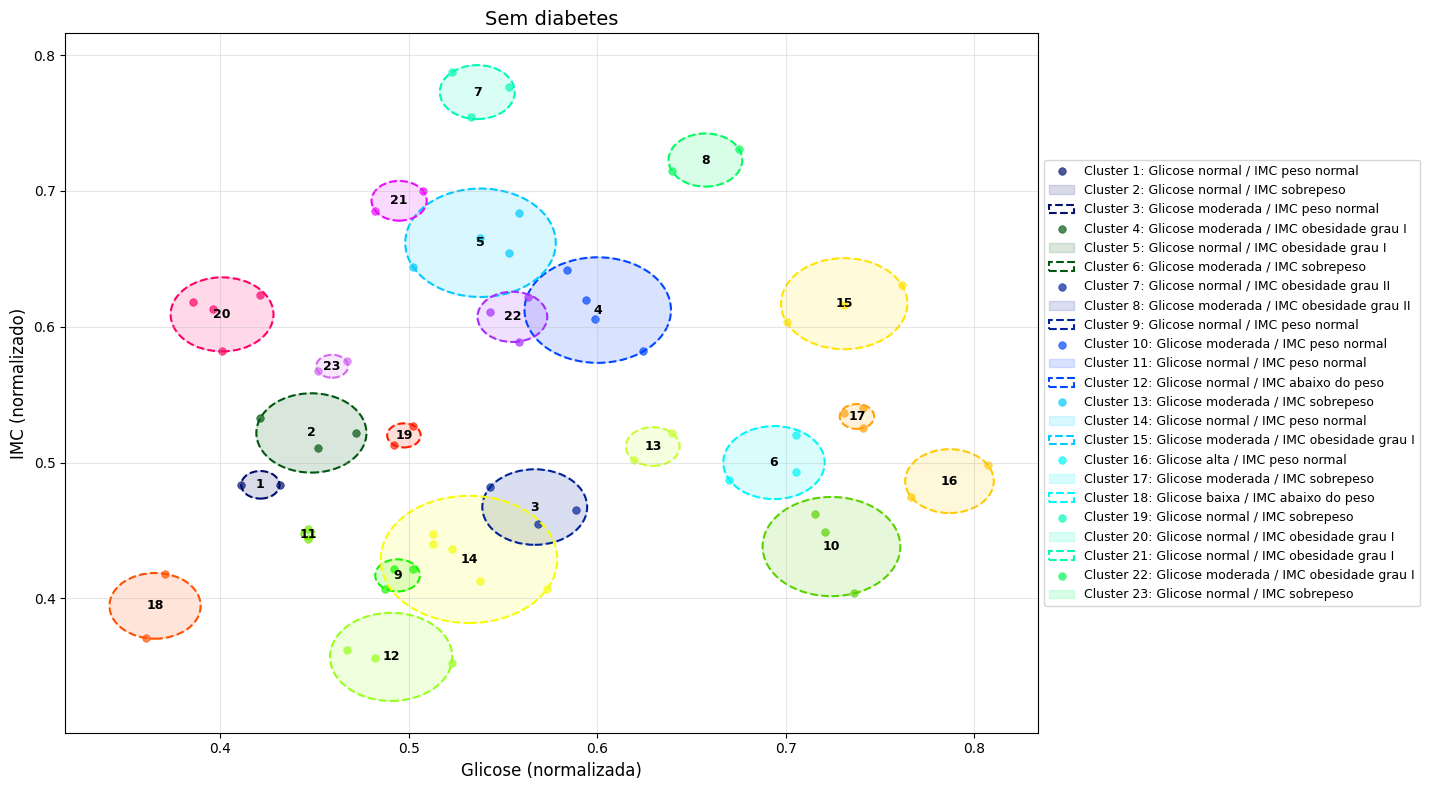

In [15]:
plt.figure(figsize=(18, 8))

numeroClusterSemDiabetes = len(clustersSemDiabetes)
    
cores = plt.cm.gist_ncar(np.linspace(0.01, 0.88, numeroClusterSemDiabetes)) # type: ignore
legendas = []

for i, cluster in enumerate(clustersSemDiabetes):
    pontosEixoXSemDiabetes = [eixoXSemDiabetesNormalizado[ponto] for ponto in cluster]
    pontosEixoYSemDiabetes = [eixoYSemDiabetesNormalizado[ponto] for ponto in cluster]
    xCentroideSemDiabete, yCentroideSemDiabete, raio = centroidesSemDiabetes[i]
    cor = cores[i % len(cores)]

    plt.scatter(pontosEixoXSemDiabetes, pontosEixoYSemDiabetes, color=cor, s=30, alpha=0.7, linewidth=0.5)

    plt.gca().add_patch(plt.Circle((xCentroideSemDiabete, yCentroideSemDiabete), raio, color=cor, alpha=0.15, zorder=0)) # type: ignore
    plt.gca().add_patch(plt.Circle((xCentroideSemDiabete, yCentroideSemDiabete), raio, color=cor, fill=False, linestyle='--', linewidth=1.5)) # type: ignore

    plt.text(xCentroideSemDiabete, yCentroideSemDiabete, str(i + 1),
             color='black', fontsize=9, fontweight='bold',
             ha='center', va='center', zorder=5)


# DANDO SIGNIFICADO AOS CLUSTERS 
    valorGlicose = xCentroideSemDiabete
    if valorGlicose >= 0.90:
        descricaoGlicose = "muito alta"
    elif valorGlicose >= 0.75:
        descricaoGlicose = "alta"
    elif valorGlicose >= 0.55:
        descricaoGlicose = "moderada"
    elif valorGlicose >= 0.40:
        descricaoGlicose = "normal"
    else:
        descricaoGlicose = "baixa"

    valorIMC = yCentroideSemDiabete
    if valorIMC >= 0.80:
        descricaoIMC = "obesidade grau III"
    elif valorIMC >= 0.70:
        descricaoIMC = "obesidade grau II"
    elif valorIMC >= 0.60:
        descricaoIMC = "obesidade grau I"
    elif valorIMC >= 0.50:
        descricaoIMC = "sobrepeso"
    elif valorIMC >= 0.40:
        descricaoIMC = "peso normal"
    else:
        descricaoIMC = "abaixo do peso"

        
    descricao = f"Glicose {descricaoGlicose} / IMC {descricaoIMC}" 
    legenda = f"Cluster {i + 1}: {descricao}"
    legendas.append(legenda)


# PLOTANDO NO GRÁFICO

plt.xlabel("Glicose (normalizada)", fontsize=12)
plt.ylabel("IMC (normalizado)", fontsize=12)
plt.title("Sem diabetes", fontsize=14)
plt.grid(True, alpha=0.3)

plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout(rect=[0, 0, 0.8, 1]) # type: ignore
plt.show()

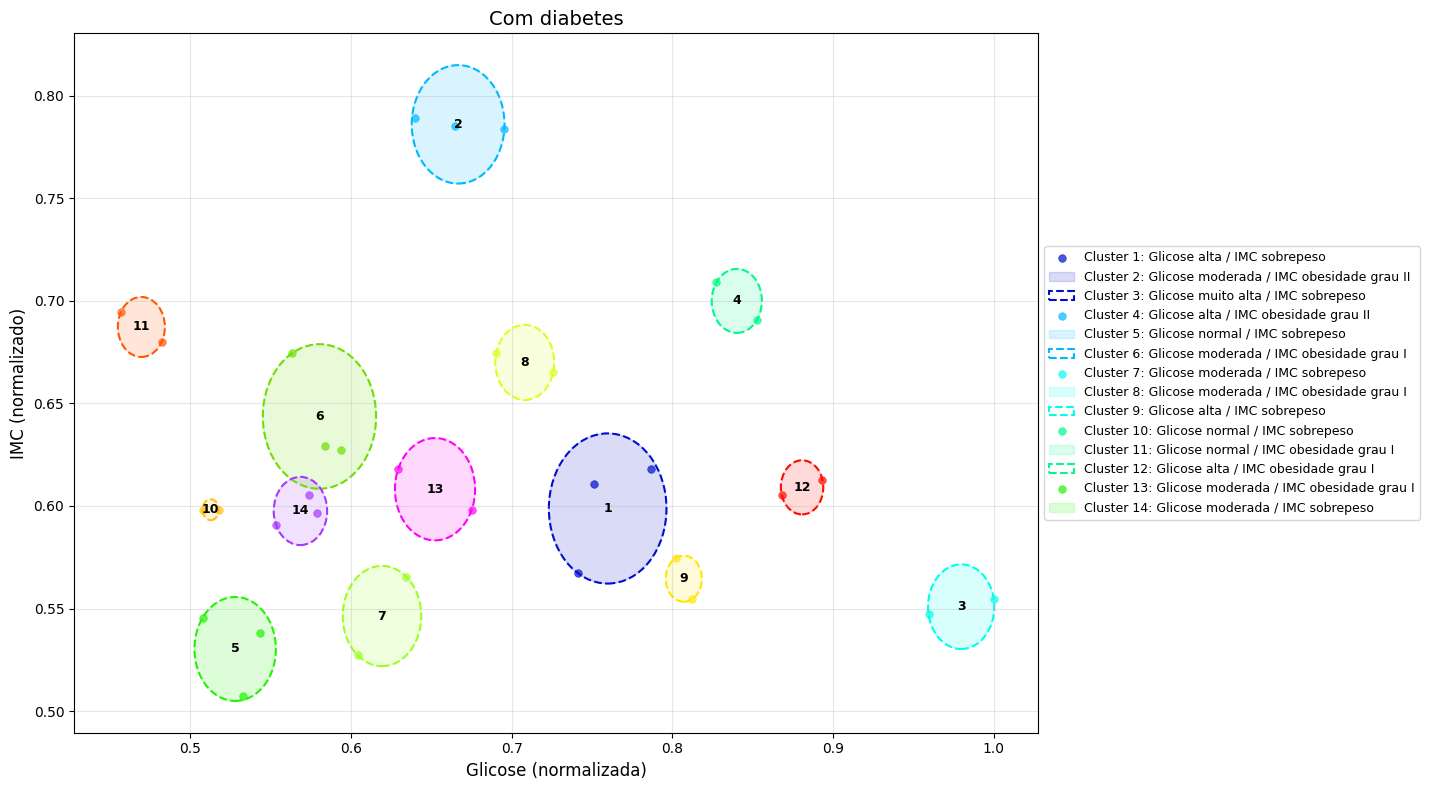

In [16]:
plt.figure(figsize=(18, 8))

numeroClusterComDiabetes = len(clustersComDiabetes)
cores = plt.cm.gist_ncar(np.linspace(0.1, 0.85, numeroClusterComDiabetes)) # type: ignore 

legendas = []

for i, cluster in enumerate(clustersComDiabetes):
    pontosEixoXComDiabetes = [eixoXComDiabetesNormalizado[ponto] for ponto in cluster]
    pontosEixoYComDiabetes = [eixoYComDiabetesNormalizado[ponto] for ponto in cluster]
    xCentroideComDiabete, yCentroideComDiabete, raio = centroidesComDiabetes[i]
    cor = cores[i % len(cores)]

    plt.scatter(pontosEixoXComDiabetes, pontosEixoYComDiabetes, color=cor, s=30, alpha=0.7, linewidth=0.5)

    plt.gca().add_patch(plt.Circle((xCentroideComDiabete, yCentroideComDiabete), raio, color=cor, alpha=0.15, zorder=0)) # type: ignore
    plt.gca().add_patch(plt.Circle((xCentroideComDiabete, yCentroideComDiabete), raio, color=cor, fill=False, linestyle='--', linewidth=1.5)) # type: ignore

    # Número do cluster no centro
    plt.text(xCentroideComDiabete, yCentroideComDiabete, str(i + 1),
             color='black', fontsize=9, fontweight='bold',
             ha='center', va='center', zorder=5)

 # DANDO SIGNIFICADO AOS CLUSTERS 
    valorGlicose = xCentroideComDiabete
    if valorGlicose >= 0.90:
        descricaoGlicose = "muito alta"
    elif valorGlicose >= 0.75:
        descricaoGlicose = "alta"
    elif valorGlicose >= 0.55:
        descricaoGlicose = "moderada"
    elif valorGlicose >= 0.40:
        descricaoGlicose = "normal"
    else:
        descricaoGlicose = "baixa"

    valorIMC = yCentroideComDiabete
    if valorIMC >= 0.80:
        descricaoIMC = "obesidade grau III"
    elif valorIMC >= 0.70:
        descricaoIMC = "obesidade grau II"
    elif valorIMC >= 0.60:
        descricaoIMC = "obesidade grau I"
    elif valorIMC >= 0.50:
        descricaoIMC = "sobrepeso"
    elif valorIMC >= 0.40:
        descricaoIMC = "peso normal"
    else:
        descricaoIMC = "abaixo do peso"


    descricao = f"Glicose {descricaoGlicose} / IMC {descricaoIMC}" 
    legenda = f"Cluster {i + 1}: {descricao}"
    legendas.append(legenda)

# PLOTANDO NO GRÁFICO
plt.xlabel("Glicose (normalizada)", fontsize=12)
plt.ylabel("IMC (normalizado)", fontsize=12)
plt.title("Com diabetes", fontsize=14)
plt.grid(True, alpha=0.3)

plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9)
plt.tight_layout(rect=[0, 0, 0.8, 1]) # type: ignore
plt.show()


#### TREINANDO MODELO REGRESSOR (PREDICAO)

In [17]:
colunasGlicoseBmi = diabetesDf[["Glucose", "BMI"]]
colunaPrevisao = diabetesDf["Outcome"]

scaler = MinMaxScaler()
xNormalizado = scaler.fit_transform(colunasGlicoseBmi)

xTreino, xTeste, yTreino, yTeste = train_test_split(xNormalizado, colunaPrevisao, test_size=0.2, random_state=42)

regressorKnn = KNeighborsRegressor(n_neighbors=2)
regressorKnn.fit(xTreino, yTreino)

classePrevisao = (regressorKnn.predict(xTeste) >= 0.5).astype(int)

#### PREVENDO SE A PESSOA TEM DIABETES OU NÃO

In [18]:
print("\n--- Verificação de Diabetes ---")

while True:
    glicose = float(input("Informe seu nível de Glucose: ")) 
    imc = float(input("Informe seu BMI (Índice de Massa Corporal): "))

    entrada = pd.DataFrame([[glicose, imc]], columns=['Glucose', 'BMI'])
    dadosNormalizados = scaler.transform(entrada)
 
    resultado = regressorKnn.predict(dadosNormalizados)[0]
    classe = int(resultado >= 0.5)

    print(f"\nDADOS: glicose: {glicose}, imc: {imc}\n", end="")

    if classe == 1:
        print("RESULTADO: Há indícios de diabetes.")
    else:
        print("RESULTADO: Não há indícios de diabetes.")
    
    resposta = input("Deseja prever novamente? (S/N) ")

    if resposta.lower() == 'n':
        break


--- Verificação de Diabetes ---


ValueError: could not convert string to float: ''